# Case
#### Digital advertising platforms try to optimize conversion rates by offering advertisers different bidding strategies. Recently, a new method called "average bidding" was introduced as an alternative to the current "maximum bidding" model. <br>

#### One of our customers, dataworld.com, decided to test whether this new model was more efficient. They wanted an A/B test to understand whether "average bidding" yielded higher conversions than "Maximum Bidding" model. <br>

#### This A/B test has been going on for a month and veridunya.com expects you to analyze the results of the test. The most important success metric for the company is the _Purchase_ metric. Therefore, statistical analysis should focus on this metric.

Data Set Description
This data set, which includes ad impressions and user interactions of an e-commerce site, includes the number of clicks on the ads that visitors see and the revenue information obtained. There are two different groups in the study:
* Control Group: Maximum Bidding method was applied.
* Test Group: Average Bidding method was applied.

The data is located on separate sheets of the Excel file named ab_test_data.xlsx.

#### Variables and Explanations
**Impression:** Number of ad views <br>
**Click:** Number of clicks on the displayed ad <br>
**Purchase:** Number of purchases after clicking on the ad <br>
**Earning:** Income earned after purchase <br>



In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# !pip install statsmodels
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, \
    pearsonr, spearmanr, kendalltau, f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

#### Task 1: Data Preparation and Analysis
##### Step 1:
* Read the control and test group data in the ab_test_data.xlsx file. <br>
* Assign the data for the control group and the test group to separate variables.

After assigning the file path to a variable, we assign file path as raw into the pandas read_excel function and sheet names are assigned to _sheet_name_


In [2]:
File_path=r"C:\Users\aykut\Desktop\GitProjects\AB_Testing_Average_Bidding\data\data.xlsx"
Control_df=pd.read_excel(File_path,sheet_name="Control Group")

First 5 raws are show by head.

In [3]:
Test_df=pd.read_excel(File_path,sheet_name="Test Group")
Control_df.head(),Test_df.head()

(   Impression     Click  Purchase   Earning
 0  82529.4593 6090.0773  665.2113 2311.2771
 1  98050.4519 3382.8618  315.0849 1742.8069
 2  82696.0235 4167.9657  458.0837 1797.8274
 3 109914.4004 4910.8822  487.0908 1696.2292
 4 108457.7626 5987.6558  441.0340 1543.7202,
    Impression     Click  Purchase   Earning
 0 120103.5038 3216.5480  702.1603 1939.6112
 1 134775.9434 3635.0824  834.0543 2929.4058
 2 107806.6208 3057.1436  422.9343 2526.2449
 3 116445.2755 4650.4739  429.0335 2281.4286
 4 145082.5168 5201.3877  749.8604 2781.6975)

##### Step 2:
**Analyze basic statistics of control and test group data.**
* Calculate basic statistics such as mean, median, standard deviation.
* Comment on whether there is a noticeable difference between the groups.

First I am going to show describe of the two Groups, then in order to make clear implementations, I will assign  mean of each columns in the two data sheets in a dataframe. 

In [4]:
ControlStats=Control_df.describe().T
ControlStats

,count,mean,std,min,25%,50%,75%,max
Impression,40.0000,101711.4491,20302.1579,45475.9430,85726.6903,99790.7011,115212.8165,147539.3363
Click,40.0000,5100.6574,1329.9855,2189.7532,4124.3041,5001.2206,5923.8036,7959.1251
Purchase,40.0000,550.8941,134.1082,267.0289,470.0955,531.2063,637.9571,801.7950
Earning,40.0000,1908.5683,302.9178,1253.9895,1685.8472,1975.1605,2119.8028,2497.2952


In [5]:
TestStats=Test_df.describe().T
TestStats

,count,mean,std,min,25%,50%,75%,max
Impression,40.0000,120512.4118,18807.4487,79033.8349,112691.9708,119291.3008,132050.5789,158605.9205
Click,40.0000,3967.5498,923.0951,1836.6299,3376.8190,3931.3598,4660.4979,6019.6951
Purchase,40.0000,582.1061,161.1525,311.6295,444.6268,551.3557,699.8624,889.9105
Earning,40.0000,2514.8907,282.7309,1939.6112,2280.5374,2544.6661,2761.5454,3171.4897


In [6]:
summary_df=pd.concat([ControlStats["mean"],TestStats["mean"]],axis=1)
summary_df.columns=["ControlGroupMean","TestGroupMean"]
summary_df

,ControlGroupMean,TestGroupMean
Impression,101711.4491,120512.4118
Click,5100.6574,3967.5498
Purchase,550.8941,582.1061
Earning,1908.5683,2514.8907


* Control and Test Groups consist of 40 rows and 4 columns each. There is no Na/NaN values.
* The impression average of the Control group is less than that of the Test group. However, the difference between the minimum and maximum values ​​of the Control group is greater than that of the Test group. Here, it can be commented that the variance value of the Control group is higher.
* While the number of impression clicks in the Control group is approximately 20 times (19.43), it is 30 times (30.37) in the Test group.
* While the average click in the Control group is 5100 clicks, there are 3967 clicks in the Test group. Although the average click in the Test group is lower, an average of 32 more purchases and an average of approximately 600 more earnings are achieved.
* While the number of clicks per impression is 187.6 in the Control group, it is 207 in the Test group.
* Average purchase and average earnings per click are 9.27-2.67 for the Control group and 6.82-1.58 for the Test group.<br>

In short: The test group's results do not look good compared to the control group. 

However, it is of course necessary to continue the calculations to see if there is a statistical superiority between the test and control groups.

##### Confidence Intervals

In [7]:
sms.DescrStatsW(Test_df["Purchase"]).tconfint_mean()

(530.5670224874668, 633.6451708094685)

In [8]:
sms.DescrStatsW(Control_df["Purchase"]).tconfint_mean()

(508.00417525045305, 593.7839422900101)

The confidence interval for the purchase data of the test group is between 530.57 and 633.65, while it is between 508.00 and 593.78 in the control group. In other words, 95 percent of the purchase averages in the test group are in this range.<br>

The difference between the confidence interval of the test group is 103, while this interval is 85 for the control group. In addition, the minimum confidence value and the maximum confidence value are higher than those of the control group.<br>

However, the values ​​are not completely different from each other.

#### Correlation

In [9]:
def Correlation(dataframe,target):
    #dataframe=input("dataframe adını giriniz")
    #target=input("Lütfen Sütun ismini giriniz")
    Other_Columns=dataframe.drop(target,axis=1).columns
    correlations=[dataframe[target].corr(dataframe[col]) for col in Other_Columns]
    for col,corr in zip(Other_Columns,correlations):
        print(f"{col} correlation with {target}:{corr}")
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=dataframe,x=target,y=col)
        plt.title(f'{target} vs {col}')
        
        

Impression correlation with Purchase:0.21457493332510497
Click correlation with Purchase:0.05739746000254058
Earning correlation with Purchase:0.061728454532799085


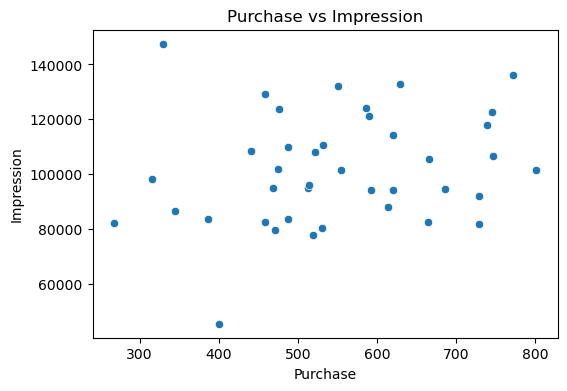

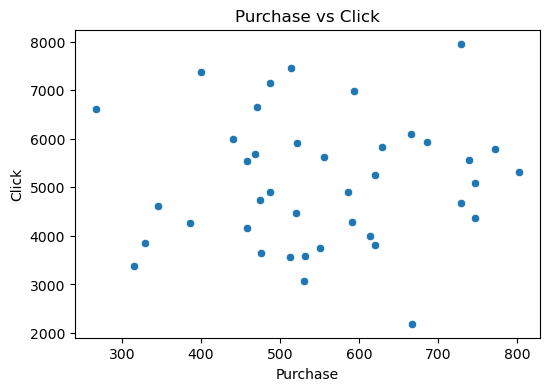

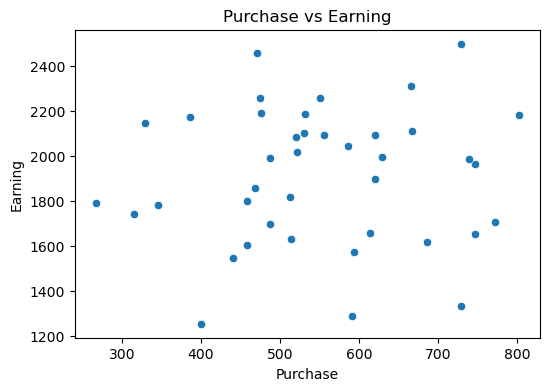

In [10]:
Correlation(Control_df,"Purchase")

When we look at the correlation results in the Control Group, we can see that no parameter has a strong relationship with Sales figures.

Impression correlation with Purchase:0.13779572364901418
Click correlation with Purchase:-0.07441443787151679
Earning correlation with Purchase:0.10248095262969038


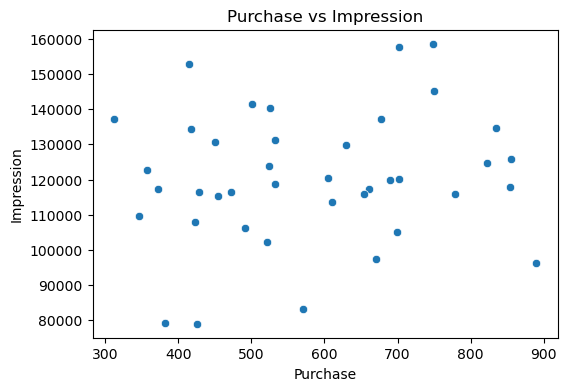

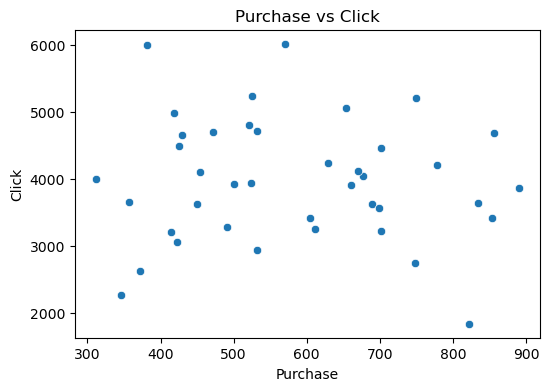

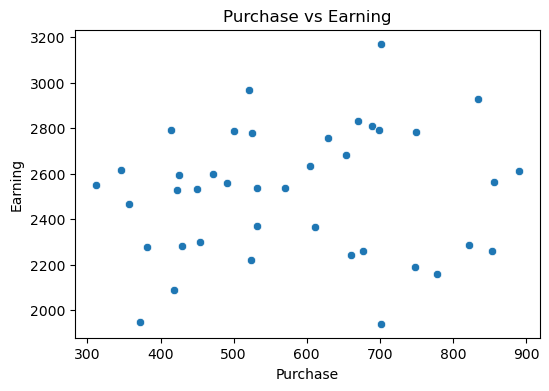

In [11]:
Correlation(Test_df,"Purchase")

There is also no strong correlation between the Sales figures of the Test Group and Other parameters.

#### Conversion rate to sales and earnings per sale calculations

Here, It needed to be made some calculations to understand which of the two methods is more efficient.

For instance, while our focus data is "Purchase", how many of the Clicks made by customers resulted in Sales? Or how much Earning was made from each Purchase? 
* The EarningPerSale value shows how much income was earned for each purchase. 
* The ClickToSale rate shows how many of each click resulted in a purchase.

In [12]:
def Rates_of_Purchase(df):
    df["ClickToSaleRate"]=(df["Purchase"]/df["Click"])*100
    df["EarningPerSale"]=(df["Earning"]/df["Purchase"])*100
    return df


In [13]:
Rates_of_Purchase(Control_df)
Control_df.head()

,Impression,Click,Purchase,Earning,ClickToSaleRate,EarningPerSale
0,82529.4593,6090.0773,665.2113,2311.2771,10.9229,347.4501
1,98050.4519,3382.8618,315.0849,1742.8069,9.3142,553.1229
2,82696.0235,4167.9657,458.0837,1797.8274,10.9906,392.4670
3,109914.4004,4910.8822,487.0908,1696.2292,9.9186,348.2368
4,108457.7626,5987.6558,441.0340,1543.7202,7.3657,350.0229


In [14]:
Rates_of_Purchase(Test_df)
Test_df.head()

,Impression,Click,Purchase,Earning,ClickToSaleRate,EarningPerSale
0,120103.5038,3216.5480,702.1603,1939.6112,21.8296,276.2348
1,134775.9434,3635.0824,834.0543,2929.4058,22.9446,351.2248
2,107806.6208,3057.1436,422.9343,2526.2449,13.8343,597.3138
3,116445.2755,4650.4739,429.0335,2281.4286,9.2256,531.7600
4,145082.5168,5201.3877,749.8604,2781.6975,14.4165,370.9620


#### Step 3:
**After the analysis process is completed, combine the control and test group data using the concat method.**

_concat_ methodu için tüm dataya yeni bir isim atandıktan sonra köşeli parantez içine birleştirmek istenen dataframelerin isimleri yazılır.  <br>
'ignore_index' değerini 'True' yapmazsak indexler tekrarlanır. 
After assigning a new name to all data frame(df), Old Dataframe names (Control_df,Test_df) could be written in the _concat_ method, as a list.<br> 
If we do not set the 'ignore_index' value to 'True', the indexes will be repeated.

A column named Group with categorical values ​​of "Control" and "Test" can be added to make future calculations easier so that it is clear which data belongs to which dataframe.

In [15]:
Control_df["Group"]="Control"
Test_df["Group"]="Test"


In [16]:
df=pd.concat([Control_df,Test_df], ignore_index=True)
df.head()  

,Impression,Click,Purchase,Earning,ClickToSaleRate,EarningPerSale,Group
0,82529.4593,6090.0773,665.2113,2311.2771,10.9229,347.4501,Control
1,98050.4519,3382.8618,315.0849,1742.8069,9.3142,553.1229,Control
2,82696.0235,4167.9657,458.0837,1797.8274,10.9906,392.4670,Control
3,109914.4004,4910.8822,487.0908,1696.2292,9.9186,348.2368,Control
4,108457.7626,5987.6558,441.0340,1543.7202,7.3657,350.0229,Control


In [17]:
df.shape

(80, 7)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Impression,80.0000,111111.9304,21623.8077,45475.9430,95063.8606,114037.0350,124138.6524,158605.9205
Click,80.0000,4534.1036,1272.3761,1836.6299,3632.8918,4321.6028,5272.6161,7959.1251
Purchase,80.0000,566.5001,148.1418,267.0289,458.1379,532.1251,679.5576,889.9105
Earning,80.0000,2211.7295,421.7006,1253.9895,1945.7132,2205.5363,2541.3775,3171.4897
ClickToSaleRate,80.0000,13.6246,6.1073,4.0403,9.4726,12.9103,15.8456,44.7886
EarningPerSale,80.0000,417.0512,133.7823,182.6339,316.8499,397.6086,517.4042,818.6783


In [19]:
df.head()

,Impression,Click,Purchase,Earning,ClickToSaleRate,EarningPerSale,Group
0,82529.4593,6090.0773,665.2113,2311.2771,10.9229,347.4501,Control
1,98050.4519,3382.8618,315.0849,1742.8069,9.3142,553.1229,Control
2,82696.0235,4167.9657,458.0837,1797.8274,10.9906,392.4670,Control
3,109914.4004,4910.8822,487.0908,1696.2292,9.9186,348.2368,Control
4,108457.7626,5987.6558,441.0340,1543.7202,7.3657,350.0229,Control


#### Task 2: Define Hypothesis for A/B Testing
##### Step 1:
* Generate hypotheses as follows:** <br>
- H0 (Null Hypothesis): There is no significant difference between the two groups. (M1 = M2)
- H1 (Alternative Hypothesis): There is a significant difference between the two groups. (M1 ≠ M2)

H0:M1=M2 --> There is no significant difference between the Control group and the Test group in terms of Purchase averages.<br>
H1:M1!=M2--> There is significant difference between the Control group and the Test group in terms of Purchase averages.

#### Step 2:
* Calculate and compare the purchase averages for the control and test groups.

In [20]:
control_mean = Control_df["Purchase"].mean()
test_mean = Test_df["Purchase"].mean()
control_mean, test_mean

(550.8940587702316, 582.1060966484677)

In [21]:
df.groupby("Group").agg({"Purchase":"mean",
                        "ClickToSaleRate":"mean",
                        "EarningPerSale":"mean"
                                                })

,Purchase,ClickToSaleRate,EarningPerSale
Group,,,
Control,550.8941,11.5926,368.8075
Test,582.1061,15.6566,465.2949


It can be seen that the Test Group has a higher purchase average than the Control Group. 
The click-to-sale conversion rate for the Test Group is higher than the Control Group. 
The income from sales is higher in the Test Group.



#### Task 3: Hypothesis Testing and Assumption Checks
##### Step 1:
**Before starting the hypothesis test, check the following assumptions:** <br>
**1. Normality Test**
* According to the test result, evaluate whether the control and test groups comply with the normality assumption. <br>


There are 2 different options to understand the normal distribution. <br>
* Shapiro-Wilk test (shapiro())
* Kolmogorov-Smirnov test (kstest()) <br>
Here, the process will be performed using shapiro, the other could have been used as well.<br>

Our hypotheses: <br>
* H0: Normality is provided in the Purchase data distribution of the Test Group and the Control Group.
* H1: Normality is not provided in the Purchase data distribution of the Test Group and the Control Group.

In [22]:
test_stat, pvalue=shapiro(df.loc[df["Group"].dropna()=="Test","Purchase"])
if pvalue<0.05:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue),("pvalue is less than 0,05,so H0 is rejected") )
else:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue), ("p-value is greater than 0,05 that's why H0 hypotesis is not be rejected."))

Test Stat=0.9589, p-value=0.1541 p-value is greater than 0,05 that's why H0 hypotesis is not be rejected.


In [23]:
test_stat, pvalue=shapiro(df.loc[df["Group"].dropna()=="Control","Purchase"])
if pvalue<0.05:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue),("pvalue is less than 0,05,so H0 is rejected") )
else:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue), ("p-value is greater than 0,05 that's why H0 hypotesis is not be rejected."))

Test Stat=0.9773, p-value=0.5891 p-value is greater than 0,05 that's why H0 hypotesis is not be rejected.


**2. Variance Homogeneity Test**
##### Step 1:
* Evaluate the test results and comment on whether there is a variance difference between the groups.

After concluding that both groups comply with the normal distribution as a result of the normality test, we perform the variance homogeneity test.<br>


For this test, the H0 and h1 hypotheses will be as follows: <br>
H0: variances are homogeneous. <br>
H0 variances are not homogeneous.<br>

In [24]:
test_stat,pvalue=levene(df.loc[df["Group"].dropna()=="Control","Purchase"],
                        (df.loc[df["Group"].dropna()=="Test","Purchase"]))
if pvalue<0.05:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue),("pvalue is less than 0,05,so H0 is rejected") )
else:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue), ("p-value is greater than 0,05 that's why H0 hypotesis is not be rejected."))


Test Stat=2.6393, p-value=0.1083 p-value is greater than 0,05 that's why H0 hypotesis is not be rejected.


Both Groups comply with Variance Homogeneity.

##### Step 2:
* Select the appropriate statistical test based on the results of the normality and variance homogeneity tests.

If the necessary conditions for the assumptions of Normality and Variance Homogeneity are met, the independent two sample T test (parametric test) was applied. If not, the Mannwhitneyu test (non-parametric test) was applied.

##### Step 3:
* Evaluate whether there is a significant difference between the purchase averages of the control and test groups by interpreting the p-value obtained as a result of the test you selected.

H0: There is no significant difference in terms of "Purchase" means between control and test groups

H1: There is a significant difference in terms of "Purchase" means between control and test groups

In [25]:
test_stat,pvalue=ttest_ind(df.loc[df["Group"].dropna()=="Control","Purchase"],
                        (df.loc[df["Group"].dropna()=="Test","Purchase"]),equal_var=True)
if pvalue<0.05:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue),("pvalue is less than 0,05,so H0 is rejected") )
else:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue), ("p-value is greater than 0,05 that's why H0 hypotesis is not be rejected."))


Test Stat=-0.9416, p-value=0.3493 p-value is greater than 0,05 that's why H0 hypotesis is not be rejected.


If the conditions required for the assumptions of Normality and Variance Homogeneity were not met, then the Mannwhitneyu test (non-parametric test) would be applied. Although it is not normally necessary, let's add it here as an example:

In [26]:
test_stat,pvalue=mannwhitneyu(df.loc[df["Group"].dropna()=="Control","Purchase"],
                        (df.loc[df["Group"].dropna()=="Test","Purchase"]))
if pvalue<0.05:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue),("pvalue is less than 0,05,so H0 is rejected") )
else:
    print("Test Stat=%.4f, p-value=%.4f" %(test_stat,pvalue), ("p-value is greater than 0,05 that's why H0 hypotesis is not be rejected."))


Test Stat=723.0000, p-value=0.4617 p-value is greater than 0,05 that's why H0 hypotesis is not be rejected.


**_Alternative Approach:_**
Instead of writing normality and variance homogeneity tests separately, we could define a function to check assumptions more efficiently.

Here is an example function:

In [27]:
from scipy.stats import shapiro, levene

def check_assumptions(group1, group2, alpha=0.05):
    """
    Normality and Variance Homogeneity Tests for Two Groups.
    """
    # Normality Test
    stat1, p1 = shapiro(group1)
    stat2, p2 = shapiro(group2)
    
    print(f"Shapiro Test - Group1 p-value: {p1:.4f}")
    print(f"Shapiro Test - Group2 p-value: {p2:.4f}")
    if p1 > alpha and p2 > alpha:
        print("Both groups seem normally distributed. H0 hypotesis could not be rejected")
    else:
        print("Normality assumption may not hold.")

    # Variance Homogeneity Test
    stat_levene, p_levene = levene(group1, group2)
    print(f"Levene Test p-value: {p_levene:.4f}")
    if p_levene > alpha:
        print("H0 hypotesis could not be rejected. So that variances are homogeneous.")
    else:
        print("Variances are not homogeneous.")

In [28]:
check_assumptions(Control_df["Purchase"], Test_df["Purchase"])

Shapiro Test - Group1 p-value: 0.5891
Shapiro Test - Group2 p-value: 0.1541
Both groups seem normally distributed. H0 hypotesis could not be rejected
Levene Test p-value: 0.1083
H0 hypotesis could not be rejected. So that variances are homogeneous.


#### Task 4: Evaluating Results
##### Step 1:
* Explain which statistical test you used and why you chose it.


The T parametric test performed with two independent samples was applied to this data set. <br>
The reasons for selecting the T-test can be stated as follows.
* Normality Assumption: The purchase data of both groups are normally distributed. <br>
In the normal distribution test results, the p value is greater than 0.05 for both groups.
* When the Variance Homogeneity Assumption is considered, this condition is also met. <br> 

The variance p values ​​of the groups are greater than 0.05. <br>

Under these conditions, using the t-test is the correct option.

##### Step 2:
* Based on your test results, which bidding strategy would you recommend to the customer? Based on the test results, does Maximum Bidding or Average Bidding seem more effective? Explain your recommendation with justification.

Since the H0 hypothesis are not rejected, there is no big difference between the Test group and the Control group. 
For this reason, the current situation can be continued. <br>

* Therefore, since there is not a big difference between Maximum Bidding and Average Bidding, the company can switch to the average bid method if it wants. For this, a decision can be made according to the method mostly used in the sector, or an analysis can be made according to the data of other companies in the same sector. 
* In order for the Average Bidding method to give better results, more data can be collected. 
* Since testing it on other samples can give better results, sample groups can be diversified. 
* Since adding more parameters to the data set will reveal the analysis result better, data can be collected according to different categories. 

**However** in the light of the information obtained, no statistical data was found showing that the **_average bid_** method is better than the **_maximum bid_** method.
